<a href="https://colab.research.google.com/github/ManishShah120/Py4DSci/blob/master/ClassifyingPersonalIncome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASSIFYING PERSONAL INCOME

## Import PANDAS To work with Dataframes

In [0]:
import pandas as pd

## Import NUMPY to perform Numerical Operation

In [0]:
import numpy as np

## Import SEABORN to visualize data

In [0]:
import seaborn as sns

## Import train_test_split from sklearn.modelselection to partition data

In [0]:
from sklearn.model_selection import train_test_split

## Importing LogisticRegression from sklearn.linear_model for logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression

## To look for performences metrics Import accuracy and confusion matrix from sklearn.metrics

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix

##----------IMPORTING DATA---------------

## To upload files as dataset from google drive ->from google.colab import drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data_income = pd.read_csv('/content/drive/My Drive/Colab Notebooks/income.csv')

## Creating a copy of the original data

In [0]:
data = data_income.copy()

In [10]:
data

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


## To check the variables datatype

In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
age              31978 non-null int64
JobType          31978 non-null object
EdType           31978 non-null object
maritalstatus    31978 non-null object
occupation       31978 non-null object
relationship     31978 non-null object
race             31978 non-null object
gender           31978 non-null object
capitalgain      31978 non-null int64
capitalloss      31978 non-null int64
hoursperweek     31978 non-null int64
nativecountry    31978 non-null object
SalStat          31978 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


###Since there exists categories under that variables of "SalStat etc etc" their datatype is seen as object

## To check wheteher there are missing values in the dataset using isnull function

In [12]:
data.isnull()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False
31976,False,False,False,False,False,False,False,False,False,False,False,False,False


## It is difficult to scim through the whole output so lets take the sum of missing values in each column so that we will get an idea about how many values or how many cell are missing under each variable, this can be done by adding .sum to the existing command 

In [13]:
print("Data columns with NULL values:\n", data.isnull().sum())

Data columns with NULL values:
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


|^ No Missing values 

## Summary of numerical variables

In [0]:
summary_num = data.describe()

In [15]:
summary_num

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


## Summary of categorical variables

In [16]:
summary_cate = data.describe(include="O") # O represents object and we are storing this in the object summary_cate
summary_cate

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


## To get Unique categories under a variable so that it gives us an idea what are the categories there in a particular variable

### Frequencies of each categories

In [17]:
data['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [18]:
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

## Checking for unique classes

In [19]:
print(np.unique(data['JobType']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


In [20]:
print(np.unique(data['occupation']))

[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


## Reading the data again by including "na_values['?]"

In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/income.csv',na_values=[" ?"])

In [22]:
data

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


## *******Pre Processing the Data*******

using the same isnull function we can find out the number missing values 

In [23]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

###### We can see that 1809 data's are missing under JobType and 1816 under occupation

# Before deciding on how to deal with the missing data lets check in a particular row either one of the column is missing or both the column values are missing

In [0]:
missing = data[data.isnull().any(axis=1)]

In [25]:
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


##### Total number of missing rows is 1816
##### And whichever rows JobType column is missing its occupation colummn is also missing



# To drop all the rows with missing values

In [0]:
data2 = data.dropna(axis=0)

In [27]:
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


# Relationship between independent variable and correlation variables

In [0]:
correlation = data2.corr()

In [29]:
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


# To look for the gender proportion using the cross table function

In [30]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [0]:
gender = pd.crosstab(index = data2["gender"],
                     columns = 'count',
                     normalize = True)

In [32]:
gender

col_0,count
gender,
Female,0.324315
Male,0.675685


### So we can see that in this dataset there are 67% male and 32% female 

# To see Variation of Gender vs Salary Status

In [0]:
gender_salstat = pd.crosstab(index = data2["gender"],
                             columns = data2['SalStat'],
                             margins = True,
                             normalize = 'index')

In [34]:
gender_salstat

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


# To visually look at the frequency distribution of 'Salary status'

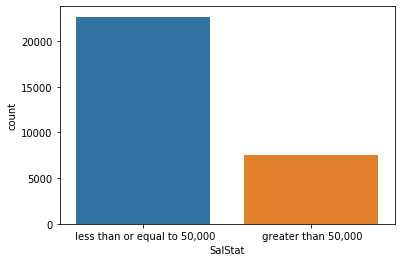

In [35]:
SalStat = sns.countplot(data2['SalStat'])

###### 75% of people's salary status is <=50,000
###### 25% of people's salary status is > 50,0000

# Plotting the Histogram of Age

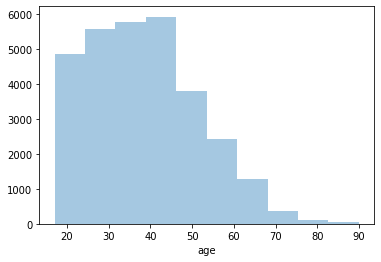

In [36]:
sns.distplot(data2['age'], bins=10, kde=False)

#### People with age 20-45 are high in frequency

# Box PLot Age vs Salary Status

SalStat
 greater than 50,000             43
 less than or equal to 50,000    34
Name: age, dtype: int64

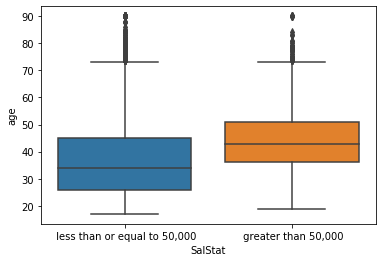

In [37]:
sns.boxplot('SalStat', 'age', data=data2)
data2.groupby('SalStat')['age'].median()

# To Build a logistic regression model, Logistic regression is a machine learning classification algorithm that is used to predict the probability of the categorical dependent variable. So Using this algorithm we'll build a classifier model based on the available data

re indexing the salary status names to 0 and 1 because the machine learining algorithm cannot work with the categorical data directly so it must be first converted into 0's and 1's

In [38]:
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,0
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,0
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,0


# Using Pandas function get_dummies we can Convert the categorical variables into dummy variable which is called as one hot encody. It refers to splitting the column which has categorical data to many column depending on the number of categories present in the column

In [0]:
new_data = pd.get_dummies(data2, drop_first=True)

In [41]:
new_data # Got Amazed to see this functions greatness

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,JobType_ Without-pay,EdType_ 11th,EdType_ 12th,EdType_ 1st-4th,EdType_ 5th-6th,EdType_ 7th-8th,EdType_ 9th,EdType_ Assoc-acdm,EdType_ Assoc-voc,EdType_ Bachelors,EdType_ Doctorate,EdType_ HS-grad,EdType_ Masters,EdType_ Preschool,EdType_ Prof-school,EdType_ Some-college,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,...,nativecountry_ Canada,nativecountry_ China,nativecountry_ Columbia,nativecountry_ Cuba,nativecountry_ Dominican-Republic,nativecountry_ Ecuador,nativecountry_ El-Salvador,nativecountry_ England,nativecountry_ France,nativecountry_ Germany,nativecountry_ Greece,nativecountry_ Guatemala,nativecountry_ Haiti,nativecountry_ Holand-Netherlands,nativecountry_ Honduras,nativecountry_ Hong,nativecountry_ Hungary,nativecountry_ India,nativecountry_ Iran,nativecountry_ Ireland,nativecountry_ Italy,nativecountry_ Jamaica,nativecountry_ Japan,nativecountry_ Laos,nativecountry_ Mexico,nativecountry_ Nicaragua,nativecountry_ Outlying-US(Guam-USVI-etc),nativecountry_ Peru,nativecountry_ Philippines,nativecountry_ Poland,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
31974,34,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
31975,23,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
31976,42,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Storing the column names

In [0]:
columns_list = list(new_data.columns)

In [43]:
columns_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Pr

###### Amazing ^^^^^^^^^^^^^

# Lets exclude the salary status from the columns list and store it as features

In [0]:
features = list(set(columns_list)-set(['SalStat']))

In [45]:
features

['nativecountry_ Jamaica',
 'EdType_ 9th',
 'nativecountry_ Dominican-Republic',
 'nativecountry_ England',
 'relationship_ Other-relative',
 'nativecountry_ Hungary',
 'nativecountry_ Vietnam',
 'nativecountry_ Iran',
 'JobType_ Self-emp-not-inc',
 'nativecountry_ El-Salvador',
 'JobType_ Self-emp-inc',
 'JobType_ Local-gov',
 'nativecountry_ Yugoslavia',
 'nativecountry_ Hong',
 'nativecountry_ China',
 'JobType_ State-gov',
 'nativecountry_ Peru',
 'nativecountry_ Italy',
 'maritalstatus_ Separated',
 'nativecountry_ Japan',
 'EdType_ 7th-8th',
 'EdType_ 1st-4th',
 'occupation_ Transport-moving',
 'occupation_ Handlers-cleaners',
 'maritalstatus_ Widowed',
 'EdType_ Assoc-acdm',
 'nativecountry_ Philippines',
 'nativecountry_ Scotland',
 'nativecountry_ Outlying-US(Guam-USVI-etc)',
 'EdType_ Some-college',
 'nativecountry_ United-States',
 'JobType_ Private',
 'race_ Asian-Pac-Islander',
 'maritalstatus_ Married-civ-spouse',
 'EdType_ 5th-6th',
 'nativecountry_ Germany',
 'maritalst

## Storing the output values in y

In [0]:
y = new_data['SalStat'].values

In [47]:
y

array([0, 0, 1, ..., 0, 0, 0])

## Storing the values from input features as x

In [0]:
x= new_data[features].values

In [49]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Slpitting the data into train and test

In [0]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=0)

In [51]:
train_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [52]:
test_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [53]:
train_y

array([0, 0, 0, ..., 1, 0, 0])

In [54]:
test_y

array([0, 0, 0, ..., 0, 0, 0])

# Make an instance of the model

In [0]:
logistic = LogisticRegression()

# Fitting the values for x and y

In [56]:
logistic.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
logistic.coef_ # using the dot operator we can get the attribute oht model

array([[-1.19719070e-02, -1.72149303e-01, -2.56690571e-02,
         1.26860139e-02, -2.44311575e-01, -3.26806020e-03,
        -3.36447341e-02, -2.69279206e-03, -5.81808807e-01,
        -3.96139696e-02,  1.61592055e-01, -2.47531986e-01,
        -5.17220241e-04, -1.25742623e-03, -2.23898593e-02,
        -1.26531761e-01, -1.20668160e-02, -1.84914196e-03,
        -1.79288661e-01, -4.72027898e-04, -2.49710983e-01,
        -7.15545539e-02, -1.95054814e-01, -3.38881191e-01,
        -9.74816050e-02, -5.95802194e-02, -8.17404557e-03,
        -3.28996656e-03, -7.40506667e-03, -3.95652130e-01,
        -4.25625762e-01, -3.27242076e-01, -1.17679963e-01,
         1.13411476e+00, -1.40096453e-01,  1.45303088e-02,
        -5.83419897e-02, -1.18135168e-02, -4.06072335e-02,
         1.64788965e-02, -9.33367135e-03, -9.57066537e-02,
        -3.50289995e-01,  5.70358908e-03,  9.03988023e-03,
        -8.31479309e-03,  7.21569881e-01, -5.75301768e-01,
         3.59605447e-03,  1.16829079e-01, -3.25728359e-0

In [58]:
logistic.intercept_

array([-1.04029557])

# Prediction from test data to check how the model works with different data

In [0]:
prediction = logistic.predict(test_x)

In [60]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

#### Now we have to evaluate the model using the confusion matrix
#### confusion matrix is the table that is used to evaluate the performance of the classification model.
#### The confusion matrix output gives us the number of correct and incorrect predictions and it'll sum up all the values calsswise

In [0]:
confusion_matrix = confusion_matrix(test_y, prediction)

In [62]:
confusion_matrix

array([[6291,  532],
       [ 947, 1279]])

## Calculating Accuracy

In [0]:
accuracy_score  = accuracy_score(test_y, prediction)

In [64]:
accuracy_score

0.8365565255829374

# Printing the misqualified values from prediction

In [65]:
print('Misclassified samlpes: %d' % (test_y != prediction).sum())

Misclassified samlpes: 1479


# *******Logistic Regression-Removing Insignificant Variables*********

In [66]:
data2 = data.dropna(axis=0)
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000': 0,' greater than 50,000': 1})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Reindexing  the salary status names to 0,1

In [67]:
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,0
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,0
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,0


In [0]:
cols = ['gender','nativecountry','race','JobType']
new_data = data2.drop(cols,axis=1)

In [0]:
new_data=pd.get_dummies(new_data, drop_first=True)

In [70]:
columns_list = list(new_data.columns)
columns_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Prof-specialty',
 'occupation_ Protective-serv',
 'occupation_ Sales',
 'occupation_ Tech-support',
 'occupation_ Transport-moving',
 'relationship_ N

In [71]:
features = list(set(columns_list)-set(['SalStat']))
features

['EdType_ 9th',
 'relationship_ Other-relative',
 'occupation_ Tech-support',
 'occupation_ Farming-fishing',
 'age',
 'occupation_ Protective-serv',
 'maritalstatus_ Never-married',
 'EdType_ Assoc-voc',
 'maritalstatus_ Separated',
 'occupation_ Sales',
 'occupation_ Exec-managerial',
 'EdType_ Masters',
 'EdType_ 7th-8th',
 'EdType_ 1st-4th',
 'occupation_ Handlers-cleaners',
 'maritalstatus_ Widowed',
 'occupation_ Transport-moving',
 'EdType_ HS-grad',
 'EdType_ Assoc-acdm',
 'relationship_ Not-in-family',
 'EdType_ Prof-school',
 'relationship_ Wife',
 'EdType_ 11th',
 'EdType_ Some-college',
 'occupation_ Craft-repair',
 'occupation_ Other-service',
 'EdType_ Doctorate',
 'capitalloss',
 'EdType_ Preschool',
 'maritalstatus_ Married-civ-spouse',
 'EdType_ 5th-6th',
 'maritalstatus_ Married-spouse-absent',
 'occupation_ Armed-Forces',
 'occupation_ Priv-house-serv',
 'maritalstatus_ Married-AF-spouse',
 'EdType_ 12th',
 'occupation_ Machine-op-inspct',
 'occupation_ Prof-specialt

In [72]:
y = new_data['SalStat'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [73]:
x = new_data[features].values
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [0]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=0)

In [0]:
logistic = LogisticRegression()

In [92]:
logistic.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
accuracy_score = accuracy_score(test_y, prediction)

TypeError: ignored

In [79]:
accuracy_score

0.8365565255829374

In [80]:
print('Misclassified samples: %d'%(test_y != prediction).sum())

Misclassified samples: 1479


# KNN Classifier model

## to classify the records into any one of the categories of the salary status

### Importing the library of KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

# Imprting library for plotting

In [0]:
import matplotlib.pyplot as plt


### Storing the K nearest neighbors classifier

In [0]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 5)

# Fitting the values for x and y

In [84]:
KNN_classifier.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Predicting the test values with model

In [0]:
prediction = KNN_classifier.predict(test_x)

# Performance metric check

In [110]:
confusion_matrix = confusion_matrix(test_y,prediction)
print("\t","Predicted values")
print("Original values","\n",confusion_matrix)### EROR

TypeError: ignored

# Calculating the accuracy

In [111]:
accuracy_score=accuracy_score(test_y, prediction)

TypeError: ignored

In [112]:
print(accuracy_score)

0.8365565255829374


In [113]:
print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 1501


# Calculating error for K Values between 1 and 20

In [0]:
Misclassified_sample = []

In [0]:
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())

In [108]:
print(Misclassified_sample)

[1715, 1506, 1562, 1475, 1501, 1435, 1469, 1445, 1459, 1420, 1467, 1453, 1441, 1429, 1453, 1436, 1444, 1422, 1439]
